# AMDEC

On suppose qu'on étudie un bras robotique. Le système est constitué de trois moteurs électriques et trois capteurs de position. Le moteur 0 assure le déplacement sur la chaîne de production, les moteurs 1 et 2 sont redondants (ici on veut dire par redondant qu'ils ont la même fonction. 2 hypothèses sont possibles : un seul moteur et le système est en panne, ou au contraire, un moteur sain suffit. Dans la suite, on a supposé un moteur en panne = système en panne) et amènent l'outil en position. Chaque capteur est lié à un moteur pour le contrôle-commande.

On fait l'hypothèse que les moteurs peuvent subir les pannes suivantes :
- problème de rotor
- problème de stator

De même, les capteurs de position peuvent subir les pannes suivantes :
- détachement du support
- court-circuit

1.1 Pour chaque équipement, faite la liste des fonctions et modes de défaillance, puis les effets.



In [1]:
import pandas as pd
AMDEC = pd.DataFrame(data = [], columns=['Equipement', 'Fonction', 'Mode de défaillance', 'Effets', 'F', 'D', 'G', 'C'])
# Réponse
AMDEC['Equipement'] = ['moteur 0', 'moteur 0', 'moteur 1', 'moteur 1', 'moteur 2', 'moteur 2', 'capteur0', 'capteur0', 'capteur1', 'capteur1', 'capteur2', 'capteur2']
AMDEC['Fonction'] = ['motricité latérale', 'motricité latérale', 'motricité outil','motricité outil', 'motricité outil', 'motricité outil', 'senseur M0',  'senseur M0', 'senseur M1', 'senseur M1', 'senseur M2', 'senseur M2']
AMDEC['Mode de défaillance'] = ['rotor', 'stator', 'rotor', 'stator', 'rotor', 'stator', 'détachement', 'court-circuit', 'détachement', 'court-circuit', 'détachement', 'court-circuit']
AMDEC['Effets'] = ['Système HS', 'Système HS','Système HS','Système HS','Système HS','Système HS', 'Système HS', 'Système HS','Système HS','Système HS','Système HS','Système HS']
print(AMDEC)

   Equipement            Fonction Mode de défaillance      Effets    F    D  \
0    moteur 0  motricité latérale               rotor  Système HS  NaN  NaN   
1    moteur 0  motricité latérale              stator  Système HS  NaN  NaN   
2    moteur 1     motricité outil               rotor  Système HS  NaN  NaN   
3    moteur 1     motricité outil              stator  Système HS  NaN  NaN   
4    moteur 2     motricité outil               rotor  Système HS  NaN  NaN   
5    moteur 2     motricité outil              stator  Système HS  NaN  NaN   
6    capteur0          senseur M0         détachement  Système HS  NaN  NaN   
7    capteur0          senseur M0       court-circuit  Système HS  NaN  NaN   
8    capteur1          senseur M1         détachement  Système HS  NaN  NaN   
9    capteur1          senseur M1       court-circuit  Système HS  NaN  NaN   
10   capteur2          senseur M2         détachement  Système HS  NaN  NaN   
11   capteur2          senseur M2       court-circui


## Fréquence
Vous récupérez les données suivantes, extraites des logs de l'année dernière :
- l'équipement a fonctionné 1714h
- le moteur 0 a fonctionné 1417h
- les moteurs 1 et 2 sont identiques et ont fonctionné 1518h
- 28 fois, le moteur 0 a eu un problème de rotor
- 31 fois, le moteur 0 a eu un problème de stator
- 14 fois, le moteur 1 a eu un problème de stator
- 17 fois, le moteur 1 a eu un problème de rotor
- 4 fois, le moteur 2 a eu un problème de rotor
- 9 fois, le moteur 2 a eu un problème de stator
- 12 fois, il y a eu un court circuit, mais impossible de savoir la source
- par 3 fois des capteurs se sont détachés

1.2 remplissez la colonne 'F', avec comme grille repère :
*   1 : < 1/1000 h
*   2 : < 1/100 h
*   3 : < 1/10 h
*   4 : < 1/1 h

In [2]:
# réponse # M0R, M0S, M12R, M12S, s012c, s012d
import numpy as np
freq = np.array([28/1417,
                 31/1417,
                 (14+9)/(1518*2),
                 (17+4)/(1518*2),
                 12/(1714*3),
                 3/(1714*3)])
print(freq)

levels = np.array([1/1000, 1/100, 1/10, 1/1])
print(levels)

def cotation(fq, levels):
    return np.min(np.argwhere(fq < levels)) + 1

list_cotation = []
for r in [0, 1, 2, 3, 2, 3, 4, 5, 4, 5, 4, 5]:
    list_cotation.append(cotation(freq[r], levels))

AMDEC['F'] = list_cotation
print(AMDEC)

[0.01976006 0.02187721 0.00757576 0.006917   0.00233372 0.00058343]
[0.001 0.01  0.1   1.   ]
   Equipement            Fonction Mode de défaillance      Effets  F    D  \
0    moteur 0  motricité latérale               rotor  Système HS  3  NaN   
1    moteur 0  motricité latérale              stator  Système HS  3  NaN   
2    moteur 1     motricité outil               rotor  Système HS  2  NaN   
3    moteur 1     motricité outil              stator  Système HS  2  NaN   
4    moteur 2     motricité outil               rotor  Système HS  2  NaN   
5    moteur 2     motricité outil              stator  Système HS  2  NaN   
6    capteur0          senseur M0         détachement  Système HS  2  NaN   
7    capteur0          senseur M0       court-circuit  Système HS  1  NaN   
8    capteur1          senseur M1         détachement  Système HS  2  NaN   
9    capteur1          senseur M1       court-circuit  Système HS  1  NaN   
10   capteur2          senseur M2         détachement  Syst

## Détection

Les capteurs de position permettent de détecter un mauvais positionnement des moteurs avec une probabilité de 45% pour le moteur 0 et 55% pour les moteurs 1 & 2.

1.3 Remplissez la colonne D, avec comme grille repère :
*   1 : 90%
*   2 : 50%
*   3 : 10%
*   4 : 0%

In [3]:
AMDEC['D'] = [3, 3, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4]

## Gravité

Deux cas sont envisagés : robot en environnement contrôlé vs robot en environnement ouvert.

1.4 Remplissez la colonne G, avec comme grille repère suivante :
*   1 : production nominale
*   2 : production ralentie
*   3 : production arrêtée
*   4 : équipement détruit / blessés humains

In [4]:
# environnement contrôlé
AMDEC['G'] = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
# environnement ouvert
# AMDEC['G'] = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

1.5 Calculez la colonne C.

In [5]:
AMDEC['C'] =  AMDEC['F'] * AMDEC['G'] *AMDEC['D']
print(AMDEC['C'])

0     27
1     27
2     12
3     12
4     12
5     12
6     24
7     12
8     24
9     12
10    24
11    12
Name: C, dtype: int64


1.6 Quels problèmes détectez-vous ? Quelles solutions ?

Le moteur 0 est critique. Solution : améliorer la détection / changer de moteur.

Les moteurs 1 & 2 sont moins critiques, on peut laisser ou changer en fonction de la finalité du robot.

## Arbres de défaillances


2.1 Faites l'arbre de défaillance du système, en ignorant les capteurs.

In [6]:
# Réponse
# Une porte OU entre M0 et le système (M1, M2), une porte OU entre M1 et M2.
# Si on considérait que les moteurs M1 et M2 se complètent, on aurait alors une porte ET

Les caractéristiques des produits sur le marché sont données dans le dataFrame ci-dessous.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#from google.colab import files
#files.upload() # Sélectionnez TP5_Catalogue.csv

In [7]:
import pandas as pd
catalogue = pd.read_csv('TP5_Catalogue.csv', sep=';')
print(catalogue.head())

  Equipement  Puissance  Prix  Fiabilite
0   Moteur 1       0.18    92       0.78
1   Moteur 2       0.25    97       0.82
2   Moteur 3       0.37   103       0.98
3   Moteur 4       0.37   107       0.99
4   Moteur 5       0.55   115       0.97


2.2 Sachant que vous avez besoin d'une puissance minimale de 0.5 pour le moteur 0 et une puissance minimale de 0.2 pour les moteurs du bras, quel choix prenez vous, sachant que vous voulez le prix minimum pour la plus grande fiabilité de votre système complet ?

  Equipement  Puissance  Prix  Fiabilite    lambda
4   Moteur 5       0.55   115       0.97  0.030459
5   Moteur 6       0.60   172       0.99  0.010050
6   Moteur 7       1.10   187       0.79  0.235722
7   Moteur 8       1.50   223       0.88  0.127833
8   Moteur 9       2.20   264       0.97  0.030459
    Prix  Fiabilite                 Choix
21   386   0.970592  [Moteur 6, Moteur 4]
23   516   0.970592  [Moteur 6, Moteur 6]
20   378   0.951567  [Moteur 6, Moteur 3]
2    329   0.951372  [Moteur 5, Moteur 4]
4    459   0.951372  [Moteur 5, Moteur 6]


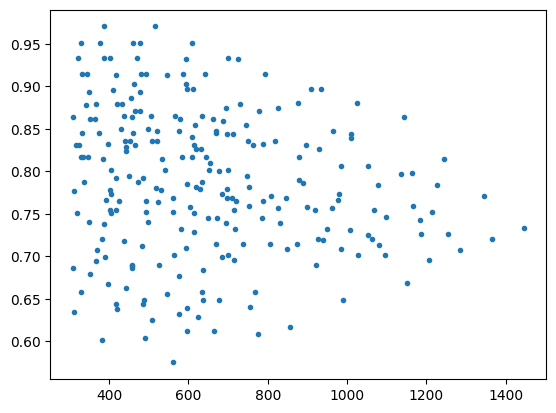

In [11]:
import matplotlib.pyplot as plt
# Réponse
# Transformer la fiabilité en taux de défaillance
catalogue['lambda'] = -np.log(catalogue['Fiabilite'])

choiceM0 = catalogue.loc[catalogue['Puissance'] > 0.5]
choiceM12 = catalogue.loc[catalogue['Puissance'] > 0.2]
print(choiceM0.head())
Compare = pd.DataFrame(data = [], columns=['Prix', 'Fiabilite', 'Choix'])


listPrix = []
listLambda = []
listFiabilite = []
listChoice = []
for ind0, M0 in choiceM0.iterrows():
    for ind12, M12 in choiceM12.iterrows():
        listPrix.append(M0['Prix'] + 2 * M12['Prix'])
        lambda_def = 1 - (1-(M0['lambda'])) *   (1 -  (1 - (1- M12['lambda'])**2))
        listLambda.append(lambda_def)
        listFiabilite.append(np.exp(-lambda_def))
        listChoice.append([M0['Equipement'], M12['Equipement']])

Compare['Prix'] = listPrix
Compare['Fiabilite'] = listFiabilite
Compare['Choix'] = listChoice

plt.plot(Compare['Prix'], Compare['Fiabilite'], '.')

print(Compare.sort_values(by=['Fiabilite', 'Prix'], ascending=[False, True]).head())


# Réseaux bayésiens



In [ ]:
!pip install bnlearn==0.8.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: bnlearn
    Found existing installation: bnlearn 0.8.4
    Uninstalling bnlearn-0.8.4:
      Successfully uninstalled bnlearn-0.8.4


In [ ]:
import bnlearn

In [ ]:
#files.upload() # Sélectionnez les données "data_printer.csv"

In [ ]:
import pandas as pd
data_printer = pd.read_csv('TP5_data_printer.csv', sep=';')
print(data_printer.head())

   Unnamed: 0  encre  question_ink  papier  question_paper  pilote  \
0           0      0             1       1               1       1   
1           1      0             1       1               1       1   
2           2      0             0       1               1       1   
3           3      1             1       0               0       1   
4           4      1             1       0               1       1   

   question_screen  action_addink  action_addpaper  action_reboot  
0                1              0                1              1  
1                1              0                1              1  
2                0              0                1              1  
3                1              1                0              1  
4                1              1                0              1  


Nous allons étudier un modèle simple d'imprimante. On suppose que cette imprimante présente 3 pannes distinctes:
- problème d'encre
- problème de papier
- problème de pilote
Vous pouvez poser 3 questions :
- y-a-til de l'encre ?
- y-a-til du papier ?
- l'écran affiche-t-il un code d'erreur ?
Vous pouvez faire 3 actions :
- remplir l'encre
- remplir le papier
- redémarrer

Nous utiliserons le package bnlearn : https://erdogant.github.io/bnlearn/pages/html/index.html

3.1 Proposez une structure de réseau bayésien, puis affichez la.

In [ ]:
import bnlearn
# Réponse:
edges = [('encre', 'papier'),
         ('papier', 'pilote'),
         ('encre', 'pilote'),
         ('papier', 'question_paper'),
         ('encre', 'question_ink'),
         ('papier', 'question_screen'),
         ('pilote', 'question_screen'),
         ('encre', 'question_screen'),
         ('pilote', 'action_addpaper'),
         ('pilote', 'action_addink'),
         ('pilote', 'action_reboot'),
         ('encre', 'action_addpaper'),
         ('encre', 'action_addink'),
         ('encre', 'action_reboot'),
         ('papier', 'action_addpaper'),
         ('papier', 'action_addink'),
         ('papier', 'action_reboot'),
         ]
DAG = bnlearn.make_DAG(edges)

[bnlearn] >bayes DAG created.


[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


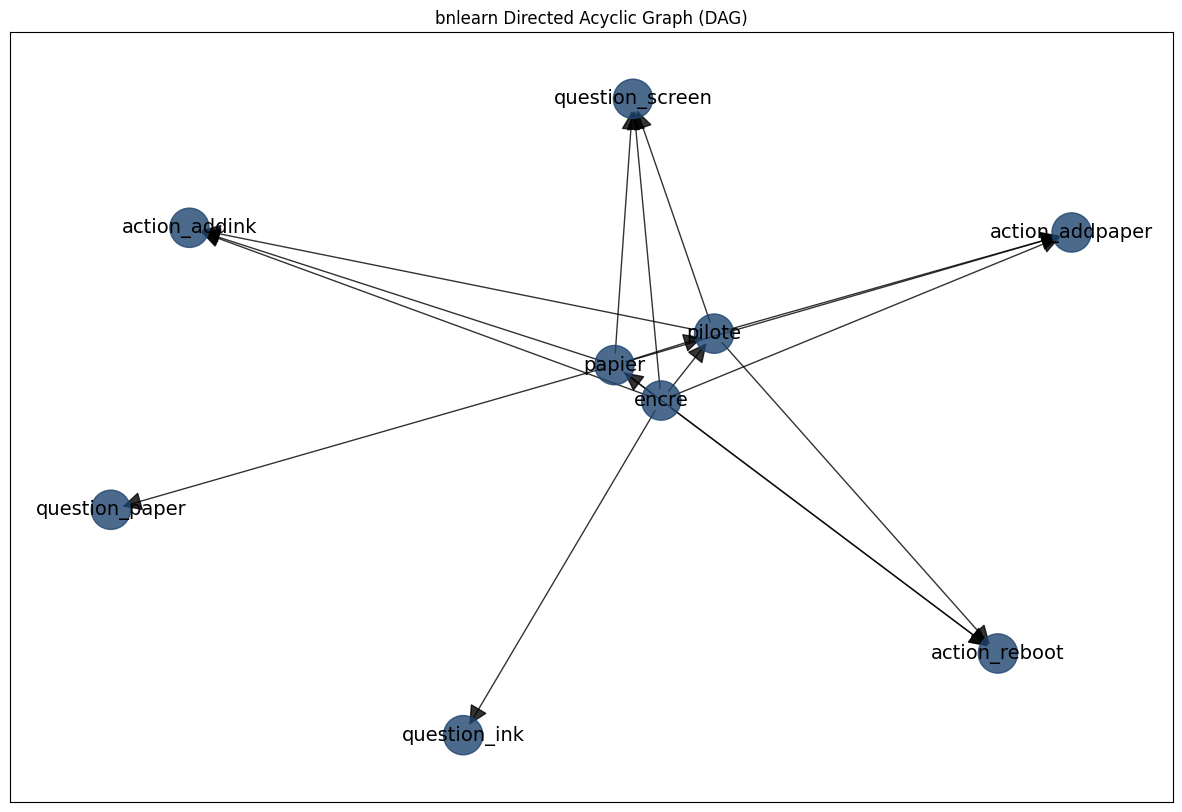

In [ ]:
#Réponse:
DAG = bnlearn.make_DAG(edges)
node_properties = bnlearn.get_node_properties(DAG);
bnlearn.plot(DAG, interactive=False, node_properties=node_properties, verbose=4);

Téléchargeons les données de l'imprimante et des maintenances associées.
Pour note:
*   encre, papier, pilote = 0 --> panne
*   action_ = 0 --> succès de l'action
*   question_ink = 0 --> pas d'encre
*   question_paper = 0 --> pas de papier
*   question_screen = 0 --> problème écran

3.2 Apprenez les paramètres du réseau bayésien.

In [ ]:
# Réponse:
import pandas as pd
dfa = pd.read_csv('TP5_data_printer.csv', sep=';')
#DAG = bnlearn.parameter_learning.fit(DAG, dfa, methodtype='ml') #'ml' / 'bayes'
DAG = bnlearn.parameter_learning.fit(DAG, dfa, methodtype='bayes')

[bnlearn] >Removing columns from dataframe to make consistent with DAG [['Unnamed: 0']]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of encre:
+----------+----------+
| encre(0) | 0.493636 |
+----------+----------+
| encre(1) | 0.506364 |
+----------+----------+
[bnlearn] >CPD of papier:
+-----------+---------------------+--------------------+
| encre     | encre(0)            | encre(1)           |
+-----------+---------------------+--------------------+
| papier(0) | 0.04604051565377532 | 0.6694793536804309 |
+-----------+---------------------+--------------------+
| papier(1) | 0.9539594843462247  | 0.3305206463195691 |
+-----------+---------------------+--------------------+
[bnlearn] >CPD of pilote:
+-----------+-----------+---------------------+---------------------+---------------------+
| encre     | encre(0)  | encre(0)            | encre(1)            | encre(1)            |
+-----------+-----------+---------------------+-------------------

3.3 Quelle est la probabilité d'avoir un problème d'encre ? de papier ? de pilote ?

In [ ]:
# Réponse:
# encre: p(encre=0) = 0.5
# papier: p(papier=0) = p(papier=0|encre=0)p(encre=0) + p(papier=0|encre=1)p(encre=1) ~ 0.0 + 0.7*0.5 = 0.35
# pilot: p(pilote=0) = 0.15
# ou en bayésien
# encre: p(encre=0) = 0.49
# papier: p(papier=0) = p(papier=0|encre=0)p(encre=0) + p(papier=0|encre=1)p(encre=1) ~ 0.05*0.5 + 0.7*0.5 ~ 0.37
# pilot: p(pilote=0) = 0.17


3.4 Sachant qu'il y a du papier, quelle est la probabilité d'avoir un problème d'encre ?

In [ ]:
# Réponse:
q1 = bnlearn.inference.fit(DAG, variables=['encre'], evidence={'question_paper': 1})
# encre(0)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   encre |        p |
+====+=========+==========+
|  0 |       0 | 0.627044 |
+----+---------+----------+
|  1 |       1 | 0.372956 |
+----+---------+----------+


3.5 Sachant qu'il y a un message sur l'écran, quelle est la probabilité d'avoir un problème de pilote ?

In [ ]:
# Réponse:
q1 = bnlearn.inference.fit(DAG, variables=['pilote'], evidence={'question_screen':0})
# pilote(0)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+----------+----------+
|    |   pilote |        p |
+====+==========+==========+
|  0 |        0 | 0.323694 |
+----+----------+----------+
|  1 |        1 | 0.676306 |
+----+----------+----------+


3.6 Quelle est la probabilité de succès par un reboot de la machine, sachant qu'il y a du papier ?

In [ ]:
# réponse
q1 = bnlearn.inference.fit(DAG, variables=['action_reboot'], evidence={'question_paper':1})
# action_reboot(0)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------+----------+
|    |   action_reboot |        p |
+====+=================+==========+
|  0 |               0 | 0.244592 |
+----+-----------------+----------+
|  1 |               1 | 0.755408 |
+----+-----------------+----------+


3.7 Quelle action entreprendre sachant qu'il y a du papier et que l'écran montre une erreur ?

In [ ]:
# Réponse
qreboot = bnlearn.inference.fit(DAG, variables=['action_reboot'], evidence={'question_paper':1, 'question_screen':0})
qaddpaper = bnlearn.inference.fit(DAG, variables=['action_addpaper'], evidence={'question_paper':1, 'question_screen':0})
qaddink = bnlearn.inference.fit(DAG, variables=['action_addink'], evidence={'question_paper':1, 'question_screen':0})
# max(q) (addink)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------+----------+
|    |   action_reboot |        p |
+====+=================+==========+
|  0 |               0 | 0.389052 |
+----+-----------------+----------+
|  1 |               1 | 0.610948 |
+----+-----------------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-------------------+----------+
|    |   action_addpaper |        p |
+====+===================+==========+
|  0 |                 0 | 0.167273 |
+----+-------------------+----------+
|  1 |                 1 | 0.832727 |
+----+-------------------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-----------------+----------+
|    |   action_addink |        p |
+=